In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def gate_find(img):

    img = img.copy()
    img = cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_CONSTANT, value=[255, 255, 255])
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]
    
    m, n = img.shape
    k1 = np.zeros(m)
    for i in range(m):
        for j in range(n):
            if img[i,j] == 255:
                k1[i] = j
                break
            elif j == n-1:
                k1[i] = j
    l1 = np.zeros(m)
    for i in range(1, k1.shape[0]-1, 2):
        l1[i] = k1[i+1] - k1[i-1]
    l1 = np.abs(l1)
    p1 = l1[l1 > 10]
    r1 = len(p1)

    k2 = np.zeros(m)
    for i in range(m):
        for j in range(n-1, -1, -1):
            if img[i,j] == 255:
                k2[i] = j
                break
            elif j == 0:
                k2[i] = j
    l2 = np.zeros(m)
    for i in range(1, k2.shape[0]-1, 2):
        l2[i] = k2[i+1] - k2[i-1]
    l2 = np.abs(l2)
    p2 = l2[l2 > 10]
    r2 = len(p2)

    k3 = np.zeros(n)
    for i in range(n):
        for j in range(m):
            if img[j,i] == 255:
                k3[i] = j
                break
            elif j == m-1:
                k3[i] = j
    l3 = np.zeros(n)
    for i in range(1, k3.shape[0]-1, 2):
        l3[i] = k3[i+1] - k3[i-1]
    l3 = np.abs(l3)
    p3 = l3[l3 > 10]
    r3 = len(p3)

    k4 = np.zeros(n)
    for i in range(n):
        for j in range(m-1, -1, -1):
            if img[j,i] == 255:
                k4[i] = j
                break
            elif j == 0:
                k4[i] = j
    l4 = np.zeros(n)
    for i in range(1, k4.shape[0]-1, 2):
        l4[i] = k4[i+1] - k4[i-1]
    l4 = np.abs(l4)
    p4 = l4[l4 > 10]
    r4 = len(p4)

    # print(sum(l1))
    # print(sum(l2))
    # print(sum(l3))
    # print(sum(l4))
    
    l = np.array([l1, l2, l3, l4])
    r = np.array([r1, r2, r3, r4])
    # print(r)
    r = np.argsort(r)
    l = l[r[::-1]]
    l = l[0:2]
    # print(sum(l[0]))
    # print(sum(l[1]))
    g = []

    if np.array_equal(l[0], l1):
        l1 = np.argsort(l1)
        l1 = l1[-r1:]
        y = np.mean(l1[0:2]).astype(int)
        x = np.median(k1).astype(int)
        # x = k1[y].astype(int)
        # for i in range(y, m):
        #     if k1[i] != k1[y]:
        #         x = k1[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l1')
    elif np.array_equal(l[0], l2):
        l2 = np.argsort(l2)
        l2 = l2[-r2:]
        y = np.mean(l2[0:2]).astype(int)
        x = np.median(k2).astype(int)
        # x = k2[y].astype(int)
        # for i in range(y, m):
        #     if k2[i] != k2[y]:
        #         x = k2[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l2')
    elif np.array_equal(l[0], l3):
        l3 = np.argsort(l3)
        l3 = l3[-r3:]
        x = np.mean(l3[0:2]).astype(int)
        y = np.median(k3).astype(int)
        # y = k3[x].astype(int)
        # for i in range(x, n):
        #     if k3[i] != k3[x]:
        #         y = k3[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l3')
    elif np.array_equal(l[0], l4):
        l4 = np.argsort(l4)
        l4 = l4[-r4:]
        x = np.mean(l4[0:2]).astype(int)
        y = np.median(k4).astype(int)
        # y = k4[x].astype(int)
        # for i in range(x, n):
        #     if k4[i] != k4[x]:
        #         y = k4[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l4')
        
    if np.array_equal(l[1], l1):
        l1 = np.argsort(l1)
        l1 = l1[-r1:]
        y = np.mean(l1[0:2]).astype(int)
        x = np.median(k1).astype(int)
        # x = k1[y].astype(int)
        # for i in range(y, m):
        #     if k1[i] != k1[y]:
        #         x = k1[i].astype(int)
        #         break
        g.append([x, y])
        #print('taken from l1')
    elif np.array_equal(l[1], l2):
        l2 = np.argsort(l2)
        l2 = l2[-r2:]
        y = np.mean(l2[0:2]).astype(int)
        x = np.median(k2).astype(int)
        # x = k2[y].astype(int)
        # for i in range(y, m):
        #     if k2[i] != k2[y]:
        #         x = k2[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l2')
    elif np.array_equal(l[1], l3):
        l3 = np.argsort(l3)
        l3 = l3[-r3:]
        x = np.mean(l3[0:2]).astype(int)
        y = np.median(k3).astype(int)
        # y = k3[x].astype(int)
        # for i in range(x, n):
        #     if k3[i] != k3[x]:
        #         y = k3[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l3')
    elif np.array_equal(l[1], l4):
        l4 = np.argsort(l4)
        l4 = l4[-r4:]
        x = np.mean(l4[0:2]).astype(int)
        y = np.median(k4).astype(int)
        # y = k4[x].astype(int)
        # for i in range(x, n):
        #     if k4[i] != k4[x]:
        #         y = k4[i].astype(int)
        #         break
        g.append([x, y])
        # print('taken from l4')
    g = np.abs(g - np.array([[50, 50],[50,50]]))
    return g

[[419  23]
 [  0 396]]


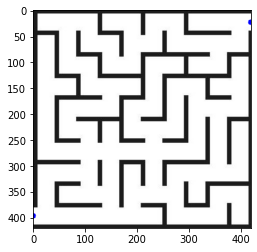

In [37]:
#img = cv.imread('../data/inputs/easy.jpg')
#img = cv.imread('test1.png')
img = cv.imread('easy.jpg')
g = gate_find(img)
print(g)
cv.circle(img, (g[0][0], g[0][1]), 5, (0, 0, 255), -1)
cv.circle(img, (g[1][0], g[1][1]), 5, (0, 0, 255), -1)
plt.imshow(img)
plt.show()